In [6]:
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import torch
    
import pandas as pd

import numpy as np

from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [7]:
train = pd.read_csv('train.csv')
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [8]:
# Make all of the data numerical 
def handle_non_numerical_data(df, categorical):
    new_df = pd.get_dummies(df, columns=categorical)
    new_df.drop(['Employee_ID'], axis=1, inplace=True)
    return new_df
    
categorical = ['Hometown','Gender','Relationship_Status','Decision_skill_possess','Unit','Compensation_and_Benefits']
df = handle_non_numerical_data(train,categorical)
df.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,...,0,0,0,0,0,0,0,1,0,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,...,0,0,0,0,0,0,0,1,0,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,...,0,1,0,0,0,0,0,1,0,0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,...,0,0,0,0,0,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Fill NA values with averages
# May have to fix to be better with one hot encoding
def fill_na(df):
    mean = df.mean(axis=0)
    df.fillna(value=mean, inplace=True)
    
    return df

df = fill_na(df)
df.tail()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,...,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
6995,23.0,5,4.0,1,20,1,2,6.0,3.0,1,...,0,0,0,0,0,0,0,0,1,0
6996,44.0,1,16.0,2,59,0,2,4.0,3.0,2,...,0,0,1,0,0,0,0,0,1,0
6997,49.0,3,10.0,1,59,1,2,3.0,4.0,2,...,0,0,0,0,0,0,0,1,0,0
6998,47.0,3,24.0,1,21,1,5,8.0,2.0,4,...,0,0,0,1,0,1,0,0,0,0
6999,58.0,3,22.0,2,74,0,4,5.0,3.0,3,...,0,0,0,0,0,0,0,1,0,0


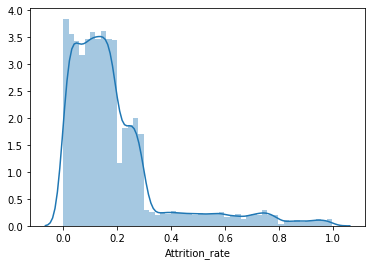

In [10]:
sns.distplot(train.Attrition_rate)

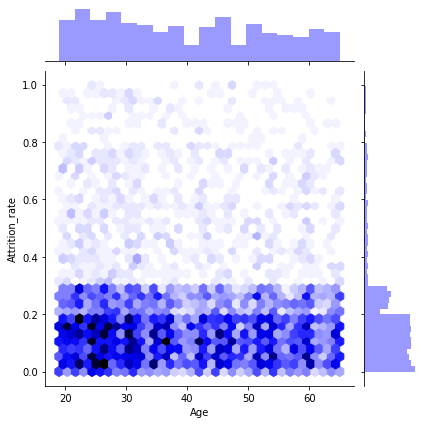

In [11]:
sns.jointplot(data=train, x='Age', y='Attrition_rate', kind='hex', color='b')
plt.show()

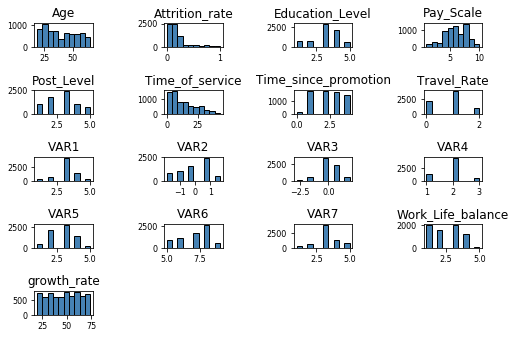

In [8]:
# Looking at distributions of all numerical variables
train.hist(color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

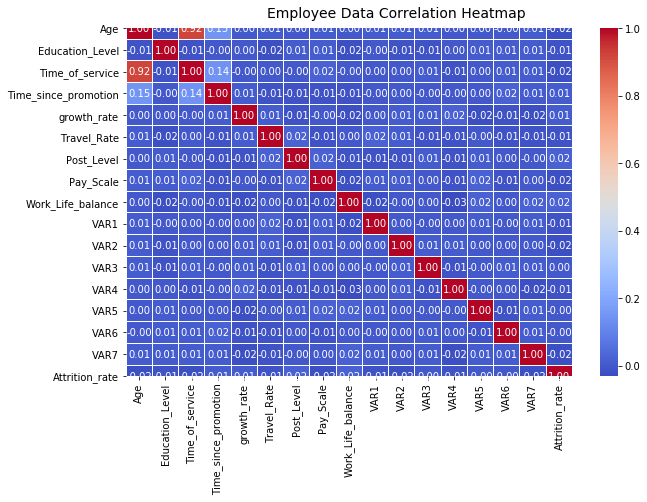

In [12]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
# Evaluating correlation of variables
corr = train.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Employee Data Correlation Heatmap', fontsize=14)

In [25]:
# Seperate into independent and dependent variable
X = df.iloc[:,:-1]
y = df.iloc[:,df.columns.get_loc('Attrition_rate')]

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
print(X)
X_train, X_test, y_train, y_test = [torch.tensor(x) for x in train_test_split(X,y.values.reshape(-1,1),test_size = 0.2, random_state= 0)]

PATH = None

if PATH:
    model = nn.Sequential(
        nn.Linear(46, 200),
        nn.LeakyReLU(),
        nn.Linear(200, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 1),
    )
    model.load_state_dict(torch.load(PATH))
    model.eval()
else:
    # Define the network
    model = nn.Sequential(
        #     3Layer200,100
        #     MSE: 1.0065309345610054e-05

        #     nn.Linear(46, 200),
        #     nn.LeakyReLU(),
        #     nn.Linear(200, 100),
        #     nn.LeakyReLU(),
        #     nn.Linear(100, 1),

        #     4Layer300,100,50,10 - mistake in file name
        #     MSE: 5.131641245171748e-05

        #     nn.Linear(46, 300),
        #     nn.Tanh(),
        #     nn.Linear(300, 50),
        #     nn.Tanh(),
        #     nn.Linear(50, 10),
        #     nn.Tanh(),
        #     nn.Linear(10,1)

        # Final model:
        # 3Layer200,100_wd1e-5
        # MSE: 4.3693086592770865e-06
        nn.Linear(46, 200),
        nn.LeakyReLU(),
        nn.Linear(200, 100),
        nn.LeakyReLU(),
        nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(model.parameters(), lr=0.01,weight_decay=1e-5)
loss_func = torch.nn.MSELoss()

BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(X_train,y_train)

loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True, num_workers=2,)

[[ 0.18009898  0.76255659 -0.91505508 ... -0.13916893  0.87999885
  -0.71819754]
 [-1.18359795 -0.17638732 -0.81755388 ... -0.13916893  0.87999885
  -0.71819754]
 [ 1.39227403 -0.17638732  1.32747267 ... -0.13916893  0.87999885
  -0.71819754]
 ...
 [ 0.71042557 -0.17638732 -0.33004784 ... -0.13916893  0.87999885
  -0.71819754]
 [ 0.55890369 -0.17638732  1.03496905 ... -0.13916893 -1.13636512
  -0.71819754]
 [ 1.39227403 -0.17638732  0.83996664 ... -0.13916893  0.87999885
  -0.71819754]]


In [26]:
# Training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        prediction = model(b_x.float())
        
        loss = loss_func(prediction.double(), b_y)
        if step == 1:
            train_r2 = r2_score(y_train, model(X_train.float()).detach().numpy())
            test_r2 = r2_score(y_test, model(X_test.float()).detach().numpy())
            print('Epoch: {} \nTrain r2: {} \nTest r2: {} \nLoss: {}\n'.format(epoch, train_r2,test_r2, loss))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

Epoch: 0 
Train r2: -67.75215946994912 
Test r2: -65.94708813470442 
Loss: 2.300133964924391

Epoch: 1 
Train r2: 0.9776038640873845 
Test r2: 0.9753543203712745 
Loss: 0.0006061717919540542

Epoch: 2 
Train r2: 0.9939823489159508 
Test r2: 0.9926481321768397 
Loss: 0.0001859074539682159

Epoch: 3 
Train r2: 0.9961277122753763 
Test r2: 0.9949009829318666 
Loss: 0.0001349820693205508

Epoch: 4 
Train r2: 0.9973841437496898 
Test r2: 0.9961630969796554 
Loss: 0.00011514081835146485

Epoch: 5 
Train r2: 0.9969790038661711 
Test r2: 0.9960919660616147 
Loss: 0.00012091027228527455

Epoch: 6 
Train r2: 0.9980686118912034 
Test r2: 0.9972210505415557 
Loss: 7.920645012448139e-05

Epoch: 7 
Train r2: 0.9980405566002353 
Test r2: 0.9970975280111284 
Loss: 6.286494630533416e-05

Epoch: 8 
Train r2: 0.9985454826119627 
Test r2: 0.9976931907375319 
Loss: 5.679315300948272e-05

Epoch: 9 
Train r2: 0.9984813523249388 
Test r2: 0.997913791790614 
Loss: 6.0888846029725366e-05

Epoch: 10 
Train r2: 0


Epoch: 83 
Train r2: 0.9999828452514616 
Test r2: 0.9999829668867308 
Loss: 6.791475013205143e-07

Epoch: 84 
Train r2: 0.9996698078271338 
Test r2: 0.9996804163791659 
Loss: 1.2755980321545145e-05

Epoch: 85 
Train r2: 0.9925841881127841 
Test r2: 0.9931647143023491 
Loss: 0.0002541572980326603

Epoch: 86 
Train r2: 0.996283345290025 
Test r2: 0.9961988932272465 
Loss: 0.00012536311668834171

Epoch: 87 
Train r2: 0.9995187948691265 
Test r2: 0.9995194817274825 
Loss: 2.1923055024983332e-05

Epoch: 88 
Train r2: 0.9998952560390363 
Test r2: 0.9998969465897296 
Loss: 2.454061940402522e-06

Epoch: 89 
Train r2: 0.9999835134165854 
Test r2: 0.9999827103372648 
Loss: 4.959057024276732e-07

Epoch: 90 
Train r2: 0.9999844075830688 
Test r2: 0.9999837083936983 
Loss: 4.0384032062420006e-07

Epoch: 91 
Train r2: 0.999987414196179 
Test r2: 0.9999873256602789 
Loss: 4.195962656651632e-07

Epoch: 92 
Train r2: 0.9999491091042676 
Test r2: 0.9999522822403989 
Loss: 1.367005701327832e-06

Epoch: 


Epoch: 165 
Train r2: 0.9999788430551201 
Test r2: 0.9999777234181759 
Loss: 7.906046849941258e-07

Epoch: 166 
Train r2: 0.9999727916701147 
Test r2: 0.9999714399841397 
Loss: 1.2947391621787793e-06

Epoch: 167 
Train r2: 0.9999135608448043 
Test r2: 0.9999166798710504 
Loss: 3.0230792910973417e-06

Epoch: 168 
Train r2: 0.9999466969522522 
Test r2: 0.9999474526096988 
Loss: 1.8389566932377749e-06

Epoch: 169 
Train r2: 0.995455506060422 
Test r2: 0.9952210535641802 
Loss: 0.0001909457503642853

Epoch: 170 
Train r2: 0.9946419636015288 
Test r2: 0.9950964427700144 
Loss: 0.00019881147418982268

Epoch: 171 
Train r2: 0.9998704875072986 
Test r2: 0.9998730624055732 
Loss: 5.774012535399799e-06

Epoch: 172 
Train r2: 0.9999745195287617 
Test r2: 0.9999722101661985 
Loss: 9.898236140359046e-07

Epoch: 173 
Train r2: 0.9999876233295333 
Test r2: 0.9999866979510681 
Loss: 3.7868541231558377e-07

Epoch: 174 
Train r2: 0.9999903751985599 
Test r2: 0.9999888051829295 
Loss: 2.536786125323277e

In [30]:
y_pred = model(X_test.float()).detach().numpy()
compare = pd.DataFrame(list(zip(y_test.detach().numpy().tolist(), y_pred.flatten().tolist())), columns=['True', 'Predicted'])
print(compare.head())
final_mse = mean_squared_error(y_test, y_pred)
torch.save(model.state_dict(), '3Layer200,100_wd1e-5Scaled.pt')
final_mse

       True  Predicted
0  [0.5142]   0.517391
1  [0.0668]   0.071932
2  [0.1293]   0.125638
3  [0.0192]   0.030462
4  [0.1457]   0.139860


5.282995787404005e-05

In [41]:
def write_to_file(test, ids):
    test = handle_non_numerical_data(test, categorical)
    test = fill_na(test)
    test = sc_X.fit_transform(test)
    test = torch.Tensor(test)
    rates = model(test.float()).flatten().tolist()
    final = pd.DataFrame(list(zip(ids, rates)), columns=['Employee_ID','Attrition_rate'])
    final.set_index('Employee_ID',inplace=True)
    print(final.head())
    final.to_csv('3Layer200,100_wd1e-5Scaled.csv')
    
test = pd.read_csv('test.csv')
write_to_file(test, test['Employee_ID'])

             Attrition_rate
Employee_ID                
EID_22713          0.132731
EID_9658           0.132698
EID_22203          0.135410
EID_7652           0.119596
EID_6516           0.123383
